#Example Weibull - Uniform  Type III

In [1]:
install.packages("survival")
devtools::install_github("dlsaavedra/rcens")
library(rcens)
library(survival)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/Rtmpp8TPU1/remotes11f2fee97e0/dlsaavedra-rcens-53d874c/DESCRIPTION’ ... OK
* preparing ‘rcens’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘rcens_0.1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Right-Censored Plot KM

Censorship percentage: 0.501

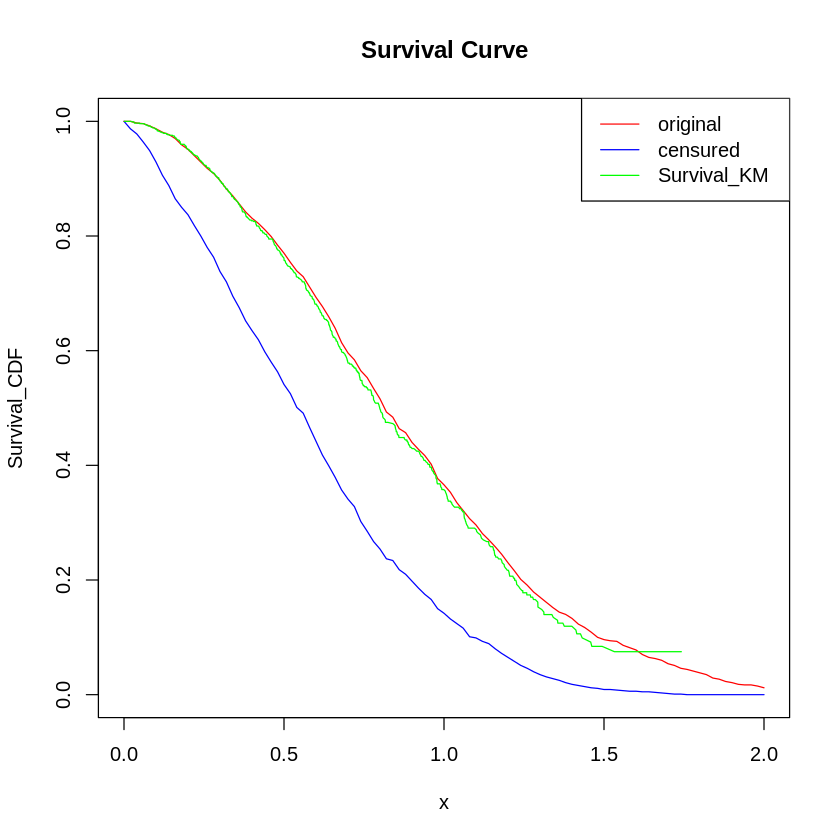

In [2]:
alpha = 2
beta = 1
scale = beta ** (-1/alpha )
theta = .5


Data = rcensT3(rdistrX = rweibull, pdistrC = punif, rdistrC = runif,
              param_X = list("shape" = alpha, "scale" = scale ),
             param_C = list("min" = 0, "max" = "lambda"),
             n = 1e03, theta = theta, n_mc = 1e04, right = TRUE)

S = Surv(Data$sample_censored,Data$censored_indicator, type = "right")
s1 = survfit(S ~ 1)

CDF_censored = ecdf(Data$sample_censored)
Survival_CDF = Vectorize(function(x){ 1 - CDF_censored(x)})
CDF_original= ecdf(Data$sample_uncensored)
Survival_CDF_original = Vectorize(function(x){ 1 - CDF_original(x)})

plot(Survival_CDF, col = "blue", xlim = c(0,2))
title("Survival Curve")
plot(Survival_CDF_original, col = "red", add= TRUE, xlim = c(0,2))
lines(s1$time, s1$surv, col = "green", xlim = c(0,2))
legend("topright",c("original","censured", "Survival_KM"),
       col = c("red", "blue", "green"), lty = 1)



## Left-Censored Plot KM

Censorship percentage: 0.493

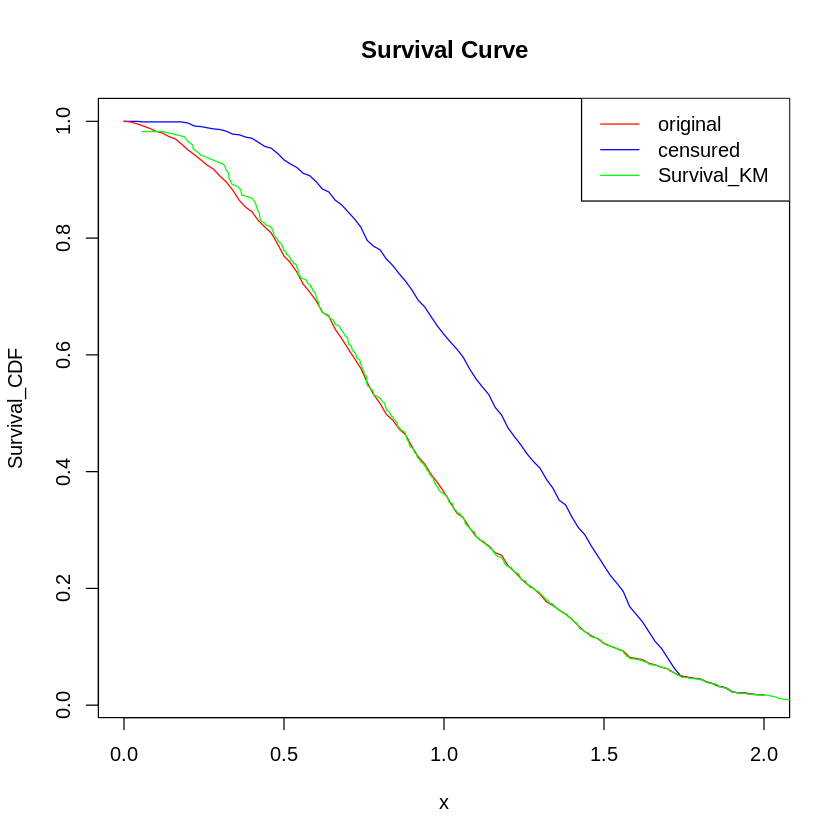

In [3]:
Data = rcensT3(rdistrX = rweibull, pdistrC = punif, rdistrC = runif,
                 param_X = list("shape" = alpha, scale = scale ),
                 param_C = list("min" = 0, "max" = "lambda"),
                 n = 1e03, theta = theta, n_mc = 1e04, right = FALSE)

S = Surv(Data$sample_censored,Data$censored_indicator, type = "left")
s1 = survfit(S ~ 1)

CDF_censored = ecdf(Data$sample_censored)
Survival_CDF = Vectorize(function(x){ 1 - CDF_censored(x)})
CDF_original= ecdf(Data$sample_uncensored)
Survival_CDF_original = Vectorize(function(x){ 1 - CDF_original(x)})

plot(Survival_CDF, col = "blue", xlim = c(0,2))
title("Survival Curve")
plot(Survival_CDF_original, col = "red", add= TRUE, xlim = c(0,2))
lines(s1$time, s1$surv, col = "green", xlim = c(0,2))
legend("topright",c("original","censured", "Survival_KM"),
       col = c("red", "blue", "green"), lty = 1)

